# PROJECT: 
## Tools for modeling various systems and their evolution. 
## Caroline Rhote-Vaney
## [5/25/2022 - ongoing]

Personal purpose of this project & an insight to my thoughts:

I have dreamed of our solar system and interstellar space since 3rd grade. I remember sometime around that point, my dad had gifted me a NASA encyclopedia and I read it so many times over and over. I loved everything about it, especially the parts detailing deep-space processes, different anomalies, black holes, neutron stars, and the wonders and mysteries of dark matter and energy. I was also quite in love with our own solar system. It is so special, and clearly has so much to offer as well. The subject of space also holds a special place in my heart. The thought of never being able to know everything, to always have the opportunity to grow grounds me. It comforts me to also know how small and insignificant we are, yet we have so much knowledge, ability to think, feel, and attribute symbolic and complex meanings to things. It seems so random- and I find that complexity in randomness is so wonderous and eloquent.

While at this point in my education I have not yet been able to do analysis or an exploration of the topics I describe, I am happy to say that after my CMSE 202 and PHY 321 classes at Michigan State University that I am able to do the things I am going to do here. The point of this project is to just have fun. To code on my own terms, without the stress of deadlines and tests and other pressures. I will demonstrate here many parts of my coding knowledge, and will run different fun experiments. I know this is very simple for what others do in my field, but I still hope this will reflect on my abilities and competence. I also hope to transfer my entheusiasm to anyone who reads this.

I know this is not a very useful section of this project. There is no "real" purpose other than to advance my abilities and solidify my knowledge, as well as to breed enjoyment and happiness within myself. I don't expect many people will be reading this, but If anyone does, I want them to know something about who wrote it. I don't say a lot about myself here, but one can gather a lot based on merely just speaking what's on your mind. Anyway, if you're reading this, I hope you find it at least a little bit cool.

enjoy :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
from math import *

# 1.  building the system - functional programming

(include information about how it is scaled)

## 1.1 - useful functions: force_planet, destroy

#### importance of the below force function.

this function is going to be the backbone of this project. I am pretty proud of it, even though it is simple. It takes all planets in a system, takes their mass and positions. This function returns the net force on a specified planet (planet_index). This is done by taking each force between that planet and others, as well as the sun. The if/else statements are just saying that if a force is between the specified planet, and a planet closer to the center of mass of the system, that the force will be negatively accounted for. This is because the force between these will be pulling the planet towards the center, making the force negative. However if the other planet exerting a force on the main planet is further away from the center, the main planet will have a force that will pull it away from the center, thus being added as a positive value. 

The idea is if we do this for all planets, each trajectory can be calculated both accurately and realistically.

In [2]:
def force_planet(planet_positions, planet_mass, planet_index):
    #returns net force based on planet positions and planet index.
    
    n = len(planet_positions)
    net_forces = np.zeros((n,2))
    alpha = 4*pi*pi
    sum = 0
    
    for i in range(n):
        
        if i != planet_index:
            rel_positions = planet_positions[planet_index] - planet_positions[i] 
            
            r_absolute = (rel_positions[0]**2+rel_positions[1]**2)**0.5

            net_forces[i] = -((alpha*planet_mass[i]/planet_mass[0])*rel_positions)/(r_absolute**3)
            
        else:
            net_forces[i] = np.array([0,0]) #if get rid of this, could model binary systems, and system more accurately
            
    for j in net_forces:
        sum += j
    
    return sum

In [3]:
def destroy(iteration, index, ax):
    
    '''
    given an iteration, either an array or list, this function 
    deletes a value you want at a specified index.
    
    the axis can be specified in the case of an array.
    '''
    t1 = []
    t2 = np.array(t1)
    
    if type(iteration) == type(t1):
        iteration.pop(index)
        
    elif type(iteration) == type(t2):
        iteration = np.delete(iteration, index, axis = ax)

In [5]:
#def plot(arr1, interruption == 'no', arr2, colorwheel):

#### Some words about the assumptions behind circular motion, notes about elliptical motion:
initial velocity
kinetic and potential energy

#### setting up the system (defining initial conditions, masses, and creating the system)

In [6]:
DeltaT = 0.001 
tfinal = 100
n = int(tfinal/DeltaT)
t = np.zeros(n)

v_j = np.zeros((n,2)) #jupiter
v_e = np.zeros((n,2)) #earth
v_me = np.zeros((n,2)) #mercury (addition 1)
v_ma = np.zeros((n,2)) #mars (addition 2)
v_v = np.zeros((n,2)) #venus (addition 3)
v_sa = np.zeros((n,2)) #saturn (addition 4)
v_u = np.zeros((n,2)) #uranus (addition 5)
v_n = np.zeros((n,2)) #neptune (addition 6)
v_p = np.zeros((n,2)) #pluto (addition 7)

#   ***additions are numbered***
# me = mercury, ma = mars,


r_j = np.zeros((n,2))
r_e = np.zeros((n,2))
r_me = np.zeros((n,2)) #1
r_ma = np.zeros((n,2)) #2
r_v = np.zeros((n,2)) #3
r_sa = np.zeros((n,2)) #4
r_u = np.zeros((n,2)) #5
r_n = np.zeros((n,2)) #6
r_p = np.zeros((n,2)) #6
r_s = np.array([0,0])

r0_j = np.array([5.2,0.0])
r0_e = np.array([1.0,0.0])
r0_me = np.array([0.39,0.0]) #1
r0_ma = np.array([1.52,0.0]) #2
r0_v = np.array([0.72,0.0]) #3
r0_sa = np.array([9.54,0.0]) #4
r0_u = np.array([19.19,0.0]) #5
r0_n = np.array([30.06,0.0]) #6
r0_p = np.array([39.53,0.0]) #7

v0_e = np.array([0.0, (2*pi)/(r0_e[0])**0.5]) #initial condition required for circular orbit is used here
v0_j = np.array([0.0, (2*pi)/(r0_j[0])**0.5])
v0_me = np.array([0.0, (2*pi)/(r0_me[0])**0.5]) #1
v0_ma = np.array([0.0, (2*pi)/(r0_ma[0])**0.5]) #2
v0_v = np.array([0.0, (2*pi)/(r0_v[0])**0.5]) #3
v0_sa = np.array([0.0, (2*pi)/(r0_sa[0])**0.5]) #4
v0_u = np.array([0.0, (2*pi)/(r0_u[0])**0.5]) #5
v0_n = np.array([0.0, (2*pi)/(r0_n[0])**0.5]) #6
v0_p = np.array([0.0, (2*pi)/(r0_p[0])**0.5]) #7


r_j[0] = r0_j
r_e[0] = r0_e
r_me[0] = r0_me #1
r_ma[0] = r0_ma #2
r_v[0] = r0_v #3
r_sa[0] = r0_sa #4
r_u[0] = r0_u #5
r_n[0] = r0_n #6
r_p[0] = r0_p #7

v_j[0] = v0_j
v_e[0] = v0_e
v_me[0] = v0_me #1
v_ma[0] = v0_ma #2
v_v[0] = v0_v #3
v_sa[0] = v0_sa #4
v_u[0] = v0_u #5
v_n[0] = v0_n #6
v_p[0] = v0_p #7

alpha = 4*pi*pi
m_j = 1.9*(10**27)
m_s = 2*(10**30)
m_e = 6*(10**24)
m_me = 3.3*(10**23) #1
m_ma = 6.6*(10**23) #2
m_v = 4.9*(10**24) #3
m_sa = 5.5*(10**26) #4
m_u = 8.8*(10**25) #5
m_n = 1.03*(10**26) #6
m_p = 1.3*(10**22) #7

planet_masses = np.array([m_s,m_me,m_v,m_e,m_ma,m_j,m_sa,m_u,m_n,m_p]) #added 1,2,3,4,5,6,7

#### computing trajectories and running the model

In [7]:
for i in range(n-1):

#first acceleration using method above
    a_0_me = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 1) #added mercury motion
    a_0_v = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 2) #added venus motion
    a_0_e = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 3) #1,2,3,4
    a_0_ma = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 4) #added mars motion
    a_0_j = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 5) #1,2,3,4
    a_0_sa = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 6) #added saturn motion
    a_0_u = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 7) #added uranus motion
    a_0_n = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 8) #added neptune motion
    a_0_p = force_planet(np.array([r_s,r_me[i],r_v[i],r_e[i],r_ma[i],r_j[i],r_sa[i],r_u[i],r_n[i],r_p[i]]), planet_masses, 9)
    
    r_me[i+1] = r_me[i] + DeltaT*v_me[i] + ((DeltaT**2)*a_0_me)/2 #mercury moion
    r_v[i+1] = r_v[i] + DeltaT*v_v[i] + ((DeltaT**2)*a_0_v)/2 #venus motion
    r_e[i+1] = r_e[i] + DeltaT*v_e[i] + ((DeltaT**2)*a_0_e)/2
    r_ma[i+1] = r_ma[i] + DeltaT*v_ma[i] + ((DeltaT**2)*a_0_ma)/2 #mars motion
    r_j[i+1] = r_j[i] + DeltaT*v_j[i] + ((DeltaT**2)*a_0_j)/2
    r_sa[i+1] = r_sa[i] + DeltaT*v_sa[i] + ((DeltaT**2)*a_0_sa)/2 #saturn motion
    r_u[i+1] = r_u[i] + DeltaT*v_u[i] + ((DeltaT**2)*a_0_u)/2 #uranus motion
    r_n[i+1] = r_n[i] + DeltaT*v_n[i] + ((DeltaT**2)*a_0_n)/2 #neptune motion
    r_p[i+1] = r_p[i] + DeltaT*v_p[i] + ((DeltaT**2)*a_0_p)/2 #pluto motion

#new acceleration
    a_1_me = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 1) #added mercury motion
    a_1_v = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 2) #added venus motion
    a_1_e = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 3) #1,2,3,4
    a_1_ma = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 4) #added mars motion
    a_1_j = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 5) #1,2,3,4
    a_1_sa = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 6) #added saturn motion
    a_1_u = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 7) #added uranus motion
    a_1_n = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 8) #adding neptune motion
    a_1_p = force_planet(np.array([r_s,r_me[i+1],r_v[i+1],r_e[i+1],r_ma[i+1],r_j[i+1],r_sa[i+1],r_u[i+1],r_n[i+1],r_p[i+1]]),planet_masses, 9) #almost done!
    

    v_me[i+1] = v_me[i] + 0.5*DeltaT*(a_1_me + a_0_me) #mercury motion
    v_v[i+1] = v_v[i] + 0.5*DeltaT*(a_1_v + a_0_v) #venus motion
    v_e[i+1] = v_e[i] + 0.5*DeltaT*(a_1_e + a_0_e)
    v_ma[i+1] = v_ma[i] + 0.5*DeltaT*(a_1_ma + a_0_ma) #mars motion
    v_j[i+1] = v_j[i] + 0.5*DeltaT*(a_1_j + a_0_j)
    v_sa[i+1] = v_sa[i] + 0.5*DeltaT*(a_1_sa + a_0_sa) #saturn
    v_u[i+1] = v_u[i] + 0.5*DeltaT*(a_1_u + a_0_u) #uranus
    v_n[i+1] = v_n[i] + 0.5*DeltaT*(a_1_n + a_0_n) #neptune
    v_p[i+1] = v_p[i] + 0.5*DeltaT*(a_1_p + a_0_p) #pluto
    
    t[i+1] = t[i] + DeltaT
    
#so much copy paste and time wasted >:( but good example to show how different ways of doing things can be vastly different.

#### visualizing the motion

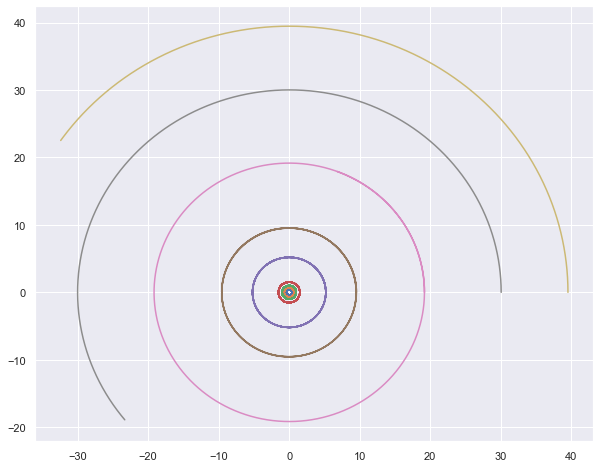

In [8]:
plt.figure(figsize = (10,8))

plt.plot(r_me[:,0],r_me[:,1])
plt.plot(r_v[:,0],r_v[:,1])
plt.plot(r_e[:,0],r_e[:,1])
plt.plot(r_ma[:,0],r_ma[:,1])
plt.plot(r_j[:,0],r_j[:,1])
plt.plot(r_sa[:,0],r_sa[:,1])
plt.plot(r_u[:,0],r_u[:,1])
plt.plot(r_n[:,0],r_n[:,1])
plt.plot(r_p[:,0],r_p[:,1])

# 2. building the system - object oriented programming

This code is still very long, but as opposed to the first method of computing orbits, the length of this code is attributed to the writing of the class. After the classes are made, deriving the orbits is MUCH shorter and there is no copy paste. None of this code is repetitive. It is more effective, and it has more functionality. Since we have created classes, we can create multiple different systems, whereas with the code above, you would have to re-do everything. This means there is more room to experiment. We could now for say, model binary star systems, or add comets to the system, and see what happens if a planet were to be randomly destroyed. There is much more efficiency and functionality here, processing speed is still long, but it seems a bit faster.

(discounting pluto because i'm lazy even though it's just a few extra numbers)

## 2.1 -  building a class for planets/comets/stars (solar system objects) 

In [10]:
class mss_object():
    
    def __init__(self, mass, radius, position_arr_i, velocity_arr_i, sort): #sort is either "planet" or "rogue"
                                                            #position is a one-d array with size 2
                                                            #mss means "massive solar system object"
                                                            #sort is kinda useless.
        
        self.mass = mass
        self.radius = radius
        self.position = position_arr_i
        self.velocity = velocity_arr_i
        self.status = sort
        self.hit = False #weither it has been hit or not
        
    def force(self):
         
        c = 4*pi*pi
        return (c*self.mass)/(self.position)**2
    
    def hit(self, rogue_position, rogue_radius):
        
        rel_dist = rogue_position - self.position
        seperation_dist = (rel_dist[0]**2+rel_dist[1]**2)**0.5
        
        if seperation_dist < (rogue_radius + self.radius):
            
            self.mass = 0 #this essentially removes a planet if touched by comet
            
    def new_pos(self, new):
        
        self.position = new
    
    def new_vel(self, new):
        
        self.velocity = new
        
    def get_mass(self):
        return self.mass
    
    def get_radius(self):
        return self.radius
        
    def get_position(self):
        return self.position
    
    def get_type(self):
        return self.status
    
    def get_velocity(self):
        return self.velocity

## note: for now, radius is useless bc we are not introducing massive rogue objects

## 2.1 - building a composite system class

In [2]:
class system():
    
    def __init__(self, mss_object_array, dt, n):
        
        self.objects = mss_object_array
        self.accelerations = np.zeros((len(mss_object_array),2))
        self.n = n
        self.dt = dt        
        
    def get_masses(self):
        
        mass_list = []
        
        for i in self.objects:
            mass = i.get_mass()
            mass_list.append(mass)
            
        return np.array(mass_list)
    
    def get_positions(self):
        positions_list = []
        
        for i in self.objects:
            pos = i.get_position()
            positions_list.append(pos)
            
        return np.array(positions_list) #2d array
    
    def get_velocities(self):
        velocities_list = []
        
        for i in self.objects:
            vel = i.get_velocity()
            velocities_list.append(vel)
            
        return np.array(velocities_list) #2d array
    
    def get_radii(self):
        radius_list = []
        
        for i in self.objects:
            rad = i.get_radius()
            radius_list.append(rad)
            
        return np.array(radius_list)
    
    def forces(self):
        force_list = []
        
        for i in self.objects:
            force = i.force()
            force_list.append(force)
            
        return np.array(force_list) 
    
    def net_acceleration(self):
        net_acc_list = []
        masses = self.get_masses()
        positions = self.get_positions()
        
        for i in range(len(self.objects)):
            
            acc = force_planet(positions, masses, i)
            
            net_acc_list.append(acc)
        
        self.accelerations = np.array(net_acc_list)    
        #return np.array(net_acc_list)
    
    def get_system_type(self):
        t_list = []
        
        for i in self.objects:
            t = i.get_type()
            t_list.append(t)
            
        return np.array(t_list)
    
    def destroy_select(self, index):
                
        self.objects = np.delete(self.objects, index, axis = 0)
        self.accelerations = np.delete(self.accelerations, index, axis = 0)
        
    def get_system_radii(self):
        r_list = []
        for i in self.objects:
            r_list.append(i.get_radius())
            
        return np.array(r_list)
            
                
#SETTING NEW VARIABLES TO UPDATE SYSTEM

    def set_new_position(self, new_pos_array):
        
        for i in range(len(self.objects)):
            self.objects[i].position = new_pos_array[i]
            
    def set_new_velocity(self, new_vel_array):
        
        for i in range(len(self.objects)):
            self.objects[i].velocity = new_vel_array[i]
                
    
#VELOCITY VERLET COMPUTATIONS

    def update_position(self,dt): 
        
        '''
        returns updated position, current acceleration before position change
        also sets new position so can get new acceleration in the next step.
        '''

        positions = self.get_positions()
        velocities = self.get_velocities()
        #not updating acceleration here.
        
            
        updated_positions = positions + dt*velocities + (dt**2)*self.accelerations/2
        
        self.set_new_position(np.array(updated_positions))
        return updated_positions, self.accelerations
        
    def update_velocity(self,acc1,dt):
        
        '''returns and sets a new velocity.
        
        get dt by doing self.dt outside the class'''
        
        velocity = self.get_velocities()
        acc_update = self.net_acceleration() #this should be updated, since the last function updates position.
        #acceleration = self.accelerations
        
            
        updated_velocities = velocity + 0.5*dt*(self.accelerations + acc1)
            
        self.set_new_velocity(np.array(updated_velocities))
        return np.array(updated_velocities)
        

#### defining planets

note: CHANGE RADIUS LATER (has to be in AU)

In [12]:
sun = mss_object(m_s, 0.0046547, np.array([0,0]), np.array([0,0]), "planet")
mercury = mss_object(m_me, 2.5788*(10**-5), r0_me, v0_me, "planet")
venus = mss_object(m_v, 4.04537*(10**-5), r0_v, v0_v, "planet")
earth = mss_object(m_e, 4.2635*(10**-5), r0_e, v0_e, "planet")
mars = mss_object(m_ma, 2.2657*(10**-5), r0_ma, v0_ma, "planet")
jupiter = mss_object(m_j, 4.6733*(10**-4), r0_j, v0_j, "planet")
saturn = mss_object(m_sa, 3.893*(10**-4), r0_sa, v0_sa, "planet")
uranus = mss_object(m_u, 1.6953*(10**-4), r0_u, v0_u, "planet")
neptune = mss_object(m_n, 1.64583*(10**-4), r0_n, v0_n, "planet")

sys = np.array([sun,mercury,venus,earth,mars,jupiter,saturn,uranus,neptune])

tf = 100
dt = 0.01
n = round(tf/dt)

#### defining a system

In [13]:
our_home = system(sys, dt, n)

#### running the object oriented model 

In [14]:
positions = []
velocities = []

#integrating
for i in range(n-1):
    
    #appending current positions and velocities
    positions.append(our_home.get_positions())   #gets current position to append to list
    velocities.append(our_home.get_velocities()) #gets current velocity
    
    #updating
    new_pos, acc1 = our_home.update_position(dt) #updating positions and acceleration to update vel
    new_vel = our_home.update_velocity(acc1,dt) #updating velocities
    
pos = np.array(positions) 
vel = np.array(velocities)

In [15]:
print(pos[:,1][:,0])

[ 0.39        0.39        0.36643586 ... -0.0169488   0.08690169
  0.18612052]


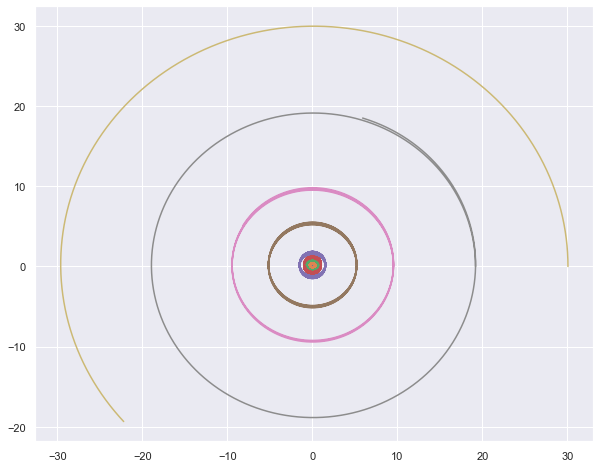

In [16]:
plt.figure(figsize = (10,8))

for i in range(9):
    plt.plot(pos[:,i][:,0], pos[:,i][:,1])


# 3. New functionalities: deleting objects, adding rogue objects, and measuring effects on systems.

So far, we are able to plot motion of stable systems. In this section though, we are going to start adding dimension and disturbances into our systems. We will be removing objects and seeing the effect on the system, and even adding a rogue object. The chaos that can result from this is quite interesting, as you will see with an example I created below.

In this section, we will also be defining functions to retrieve and plot trajectories, this will make things much easier as  we won't always have to write a new loop to do so. The functions will be simple, in retrieving the motion of the mss_objects in a system, in order to delete an object there must be a specific timestep given at which you want this to happen. Now, in real life, this doesn't work like that. When planets are destroyed in real life, due to collisions or other reasons, we don't know when that is supposed to happen off the top of our heads. So while this function has limitations, we will use it as part of another function in the next section as an aid in running some models a bit more applicable to real life scenarios.

## 3.1 - an example, a theoretical system with a rogue planet, and we take the sun away

here, only the 4 innermost planets of the system were included. The sun is taken away at a random timestep, here I chose 1000. This is just to test my code. More utility will be provided later.

#### re-initializing the system

this needs to be re-ran everytime because the system will change after the motion cell is ran.

In [17]:
sun = mss_object(m_s, 0.0046547, np.array([0,0]), np.array([0,0]), "planet")
mercury = mss_object(m_me, 2.5788*(10**-5), r0_me, v0_me, "planet")
venus = mss_object(m_v, 4.04537*(10**-5), r0_v, v0_v, "planet")
earth = mss_object(m_e, 4.2635*(10**-5), r0_e, v0_e, "planet")
mars = mss_object(m_ma, 2.2657*(10**-5), r0_ma, v0_ma, "planet")
jupiter = mss_object(m_j, 4.6733*(10**-4), r0_j, v0_j, "planet")
saturn = mss_object(m_sa, 3.893*(10**-4), r0_sa, v0_sa, "planet")
uranus = mss_object(m_u, 1.6953*(10**-4), r0_u, v0_u, "planet")
neptune = mss_object(m_n, 1.64583*(10**-4), r0_n, v0_n, "planet")

sys = np.array([sun,mercury,venus,earth,mars,jupiter,saturn,uranus,neptune])

tf = 100
dt = 0.01
n = round(tf/dt)

### defining theoretical system (sun, our 4 inner planets, a rogue planet)

In [18]:
radius_rp = 10**(-4)
mass_rp = 9*(10**26)
r0_rp = np.array([5,3.5])
v0_rp = -0.999999*np.array([(2*pi)/(r0_rp[0])**0.5, (0.7*pi)/(r0_rp[1])**0.5]) #diagonal velocity so vx=vy=v0*sqrt(2)
rogue_planet  = mss_object(mass_rp, radius_rp, r0_rp, v0_rp, "rogue")

sys_inner = np.array([sun,mercury,venus,earth,mars,rogue_planet])

#the system
inner_home = system(sys_inner, dt, n)
#inner_home.get_positions()

array([[0.  , 0.  ],
       [0.39, 0.  ],
       [0.72, 0.  ],
       [1.  , 0.  ],
       [1.52, 0.  ],
       [5.  , 3.5 ]])

In [268]:
#print(type(inner_home.get_positions()))

<class 'numpy.ndarray'>


### running this model

here, there are conditions for when the sun will be deleted from the system. since the position and velocity arrays cannot be different shapes, the list after and before the given timestep will be seperate. To make them the same size, below I insert a zero into the array which exists after the timestep.

In [19]:
positions_inner = []
velocities_inner = []

positions_inner_2 = []
velocities_inner_2 = []

for j in range(n-1):
    
    if j < 1000:
        
        positions_inner.append(inner_home.get_positions())
        velocities_inner.append(inner_home.get_velocities())

        new_pos_inner, acc1_inner = inner_home.update_position(dt) #updating position
        new_vel_inner = inner_home.update_velocity(acc1_inner,dt) #updating velocity
    
    elif j == 1000:

        positions_inner.append(inner_home.get_positions())
        velocities_inner.append(inner_home.get_velocities())

        new_pos_inner, acc1_inner = inner_home.update_position(dt)
        new_vel_inner = inner_home.update_velocity(acc1_inner,dt)
        
        #deleting, so that the iterations after this one will have a different system to work with.
        inner_home.destroy_select(0) 
        
    elif j > 1000:
        #since deleted object, lists will be of a different length, so I made a new list to append to.
        positions_inner_2.append(inner_home.get_positions())
        velocities_inner_2.append(inner_home.get_velocities())

        new_pos_inner, acc1_inner = inner_home.update_position(dt)
        new_vel_inner = inner_home.update_velocity(acc1_inner,dt)
        

In [20]:
#making arrays out of the lists (before timestep)
pos_i = np.array(positions_inner) 
vel_i = np.array(velocities_inner)

#making arrays out of the lists (after)
pos_i_2 = np.array(positions_inner_2) 
vel_i_2 = np.array(velocities_inner_2)

#adding a 0 to the column where the sun should exist in the array after the timestep, axis specified as 1 to indicate
#insertion at a column position.
pos_i_2 = np.insert(pos_i_2, 0, np.array([0,0]), axis = 1)
vel_i_2 = np.insert(vel_i_2, 0, np.array([0,0]), axis = 1)

#print(np.shape(pos_i_2), np.shape(pos_i))

(-100.0, 100.0)

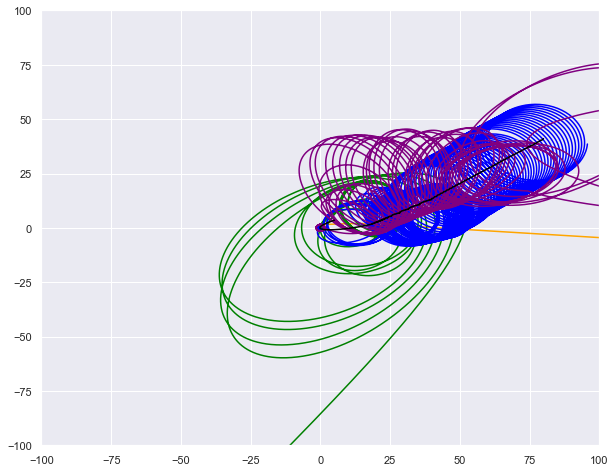

In [21]:
plt.figure(figsize = (10,8))


###NOTES
#------------------------------------------------------------------------------------------------------>
#add a condition for if a planet is deleted, also for if you want to choose colors, also a condition
#for if you don't want to plot the np.array[0,0] of the deleted planet that is added for symmetry 

#maybe do a double loop so it isn't copy paste
#------------------------------------------------------------------------------------------------------>


for i in range(6):
    if i == 0:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'red')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'red')
        
    if i == 1:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'orange')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'orange')
        
    if i == 2:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'green')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'green')
        
    if i == 3:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'blue')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'blue')
        
    if i == 4:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'purple')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'purple')
        
    if i == 5:
        
        plt.plot(pos_i[:,i][:,0], pos_i[:,i][:,1], color = 'black')
        plt.plot(pos_i_2[:,i][:,0], pos_i_2[:,i][:,1], color = 'black')
        
    
    
plt.ylim((-100,100))
plt.xlim((-100,100))

In [52]:
#print(pos_i_2)
print(pos_i_2[:,5])  #[i,:][j,0]

[[ 0.          0.        ]
 [-0.28152087  1.13056557]
 [ 0.79255687  2.82660394]
 [-0.83985269 -0.62338558]
 [ 0.77141616  0.39681766]
 [18.36825123  1.70301788]]


## 3.2 - new functions for further analysis: getting motion and plotting

*****rn only have motion if given a timestep. next have to make a motion one where there is radius involved.

the motion function plots motion of a system. You can give a timestep at which you want a given mss_object to be destroyed from the system. As said in the intro of part 3, this function is limited in that you can only provide one timestep, but later this will be implicated in a more practical sense and we can perform collisions.

the plotting function plots the data from the motion function and a colorwheel of your choice can be provided for each mss_object's trajectory. (ADD MORE FUNCTIONALITY FOR IF MULTIPLE COLLISIONS)

In [ ]:
###### motion function given a timestep, destroy = 'yes' or 'no', and the system

def motion(system_object, n, dt, destroy = 'no', timestep = 'none', index = 'none'):
    
    '''
    system_object is a system object.
    n is an integer, defining the total number of timesteps
    dt is the time between timesteps
    destroy can either be defined as yes or no.
    timestep can either be none, or an integer.
    index is the index at which the given planet will be destroyed. can be either none, or an integer.
    
    '''
    if destroy == 'no' and type(timestep) == str:
        pos = []
        vel = []
        
        for i in range(n-1):
            
            pos.append(system_object.get_positions())
            vel.append(system_object.get_velocities())

            new_pos, acc = system_object.update_position(dt) 
            new_vel = system_object.update_velocity(acc,dt)
            
        return np.array(pos)

    elif destroy == 'yes':
        pos_1 = []
        vel_1 = []
        pos_2 = []
        vel_2 = []
        
        for i in range(n-1):
        
            if i < timestep:
                
                pos1.append(system_object.get_positions())
                vel1.append(system_object.get_velocities())
                
                new_pos1, acc1 = system_object.update_position(dt) 
                new_ve1l = system_object.update_velocity(acc1,dt)
                
            elif i == timestep:
                
                pos1.append(system_object.get_positions())
                vel1.append(system_object.get_velocities())
                
                new_pos1, acc1 = system_object.update_position(dt) 
                new_ve1l = system_object.update_velocity(acc1,dt)
                
                system_object.destroy_select(0)
             
            elif i > timestep:
                
                pos2.append(system_object.get_positions())
                vel2.append(system_object.get_velocities())
                
                new_pos2, acc2 = system_object.update_position(dt) 
                new_ve12 = system_object.update_velocity(acc2,dt)
                
        pos_2_arr = np.array(pos_2)
        pos_1_arr = np.array(pos_1)
        pos_2_arr = np.insert(pos_2_arr, index, np.array[0,0], axis = 1)
                
        return pos_1_arr, pos_2_arr

In [1]:
print(len(pos_i_2[0,:]))

NameError: name 'pos_i_2' is not defined

In [ ]:
def plot_motion(pos_arr_1, pos_arr_2, colorwheel):
    
    '''
    pos_arr_1 and pos_arr_2 are 2 dimensional position arrays, before and after the timestep respectively.
    colorwheel is a list of color names. it should be equivalent to the length of both arrays[0,:] indexed
    
    this function returns plots.
    '''
    
    for i in range(len(pos_arr_1[0,:])):
            
        plt.plot(pos_arr_1[:,i][:,0], pos_arr_1[:,i][:,1], color = colorwheel[i])
        plt.plot(pos_arr_2[:,i][:,0], pos_arr_2[:,i][:,1], color = colorwheel[i])
        
        #can make this more compact if instead of writing multiple lines, have an option where the array can consist
        #of multiple position arrays, and have the loop iterate over each array provided in the compact array.
        # ex: arr = np.array[arr1, arr2, arr3]
        # for i in range:
        # for j in arr:
        #       plt. plot(j[:,i][:,0])......
    

# 4. Allowing conditions for collisions

## 4.1 - more extensive motion function that allows for collisions

-include radius.

-each timestep, check radius between each planet

-if planet comes into contact, destroy planets (whatever that may mean. simple for now, just delete the smaller planet if much smaller and delete both if they are of similar masses)

distance checking function

In [3]:
def check(system_object):
    
    sys_rad = system_object.get_system_radii()
    positions = system_object.get_positions()
    indexes_touching = []
    list_place = 0 #keeps track of how many planets have come into contact during this check
                   #(in the rare instance that there is more than one collision at once)
    
    for i in range(len(positions)): #i is planet comparing to all other planets, which is j
        for j in range(len(positions)):
            
            if i != j:
                
                rel_pos = ((positions[i] - positions[j])**2)**0.5 #absolute value
                rad_i = sys_rad[i]
                rad_j = sys_rad[j]
                
                if rel_pos < (rad_i + rad_j):
                    
                    indexes_touching.append([i,j])
                    
    return indexes_touching #if len of this = 0, this means no collision and no planets need to be deleted in motion.
                    

new motion function

In [5]:
def vers_motion(system_object, dt, n):
    
    timestep = n
    i = 0

 
    positions = [] #[arr1, arr2, arr3] start new array everytime new collision in large pos array
    velocities = []
    #pos and vel here are (1st, redefined as arrays,) THEN wiped once loop ends, and arrays are appended to large_pos_array
    
    large_pos_list = []
    large_vel_list = [] #these need to be equalized later. 0s need to be added in the place where spots were deleted
    
    deleted_indexes = []
    cycles = 0 #this will keep track of length of the large_pos_list

    #integrating
    while i < n:#in range(n-1): 
        
        collision_chance = check(system_object)
        
        if len(collision_chance) == 0: #don't delete a planet, carry on as normal
        
            #getting current pos and vel ---> so we can update pos, vel, and acc below
            positions.append(system_object.get_positions())   
            velocities.append(system_object.get_velocities()) 

            #updating
            new_pos, acc1 = system_object.update_position(dt)
            new_vel = system_object.update_velocity(acc1,dt)  
            
            i += 1

        else: 
            
            deleted_indexes.append(collision_chance) #keeps track of which planets were destroyed so we can fill in shorter arrays
            arr_pos = np.array(positions)
            arr_vel = np.array(velocities)
            
            large_pos_list.append(arr_pos)
            large_vel_list.append(arr_vel)
            
            positions = []
            velocities = [] #have to wipe both lists
            
            
            #this part is just messed up
            for obj in deleted indexes[cycle]: #####################DESTROY< KEEP IN MIND ABOUT INDEXES AFTER LIST GETS SHORTER
                #############################MAY HAVE TO WIPE DELETED INDEXES (no, added cycles.)
                if system_objects.objects[obj] < system_objects.objects[obj]:
                    our_home.destroy_select(obj[0])
                
                elif system_objects.objects[deleted_indexes[cycles][0]] > system_objects.objects[deleted_indexes[cycles][1]]:
                    our_home.destroy_select(deleted_indexes[cycles][1])
            
                else:
                    print("edit later")
                    
            #starting a new cycle.
            cycles+=1
            i += 1
            
            

            
            

SyntaxError: invalid syntax (<ipython-input-5-b5880dc53a8c>, line 48)

#where i left off:

- do not seek to end the loop
- destory planets accordingly
- figure out how to fill in the later cycles of pos and vel. use cycles, deleted indexes, and large pos array.


## moving forward:

make a plotting function

make a motion plotting function

### comment: when sun disappears, the force of gravity in the circular sense does not apply. make a new get_positions and get_velocities (or add an if statement and then add an argument in the parenthesis), and add the new force. Gravitational interactions still exist, but also idk. maybe it is accurate. because grav force is the only force on them.

# Left to finish: 

# 3. adding disturbances- lower mass objects (rogue comets)

# 4. adding disturbances- massive objects (rogue dwarf stars)

# 5. binary systems

# 6. animated destruction of systems/3d depictions
I am become death, destroyer of virtual worlds.

# 7. explore current trajectories and gravity assists. 

### future: plot luminosity as planets pass by. (scale y axis if needed)